# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2024-09-29 13:35:24.995014: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 13:35:25.005649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 13:35:25.017489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 13:35:25.021747: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 13:35:25.031204: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.__version__

'2.17.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('019.Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
pd.DataFrame(X, columns=dataset.columns[3:-1])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.8,3,1,0,113931.57
3,699,France,Female,39,1,0.0,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.0,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.0,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### Encoding categorical data

#### Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
pd.DataFrame(X, columns=dataset.columns[3:-1])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.0,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.8,3,1,0,113931.57
3,699,France,0,39,1,0.0,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.0,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.0,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


#### One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
columns = ['Geography [0]', 'Geography [1]', 'Geography [2]', 'CreditScore'] + list(dataset.columns[5:-1])
pd.DataFrame(X, columns=columns)

,Geography [0],Geography [1],Geography [2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
pd.DataFrame(X_train, columns=columns)

,Geography [0],Geography [1],Geography [2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.014607,-0.569844,1.743090,0.169582,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-1.014607,1.754865,-0.573694,-2.304559,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,0.985604,-0.569844,-0.573694,-1.191196,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,-1.014607,-0.569844,1.743090,0.035566,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,-1.014607,-0.569844,1.743090,2.056114,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.014607,1.754865,-0.573694,-0.582970,-1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,-1.014607,-0.569844,1.743090,1.478815,-1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,0.985604,-0.569844,-0.573694,0.901515,0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-1.014607,-0.569844,1.743090,-0.624205,-1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


## Part 2 - Building the ANN

### Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

I0000 00:00:1727613375.368639   37562 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727613375.414033   37562 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727613375.416076   37562 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727613375.419205   37562 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

### Training the ANN on the Training set

In [18]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


I0000 00:00:1727613381.757341   37872 service.cc:146] XLA service 0x70b078008370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727613381.757505   37872 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-09-29 13:36:21.786078: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-29 13:36:21.906950: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.3808 - loss: 0.9610
Epoch 2/100


I0000 00:00:1727613382.378511   37872 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.7833 - loss: 0.5392
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8037 - loss: 0.4678
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.8064 - loss: 0.4410
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8080 - loss: 0.4316
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8244 - loss: 0.4021
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.8249 - loss: 0.4081
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8413 - loss: 0.3868
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8409 - loss: 0.3808
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8420 - loss: 0.3767
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8509 - loss: 0.3715
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8570 - loss: 0.3486
Epoch 13/100
250/250 ━━━━━━━━━

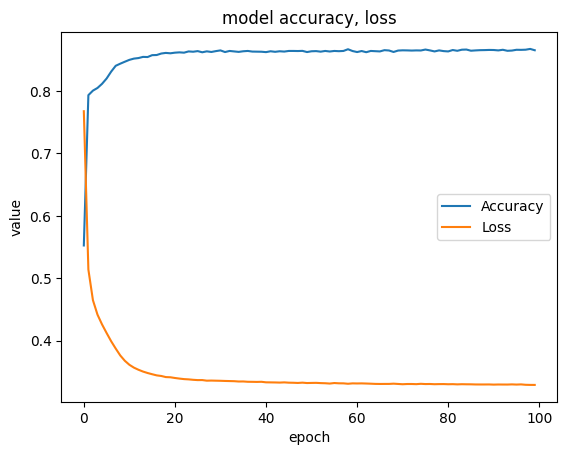

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy, loss')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [20]:
T = np.array([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])
pd.DataFrame(T, columns=columns)

,Geography [0],Geography [1],Geography [2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,0,0,600,1,40,3,60000,2,1,1,50000


In [21]:
T = sc.transform(T)
pd.DataFrame(T, columns=columns)

,Geography [0],Geography [1],Geography [2],CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.985604,-0.569844,-0.573694,-0.521116,0.916013,0.109617,-0.68539,-0.256906,0.809503,0.642595,0.968738,-0.872033


In [22]:
print(ann.predict(T))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.01480273]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

### Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cmDf = pd.concat([pd.DataFrame([['Customer will stay'], ['Customer will leave']], columns=['Predictions']), pd.DataFrame(cm, columns=['correct', 'incorrect'])], axis=1)
cmDf.set_index(['Predictions'])
cmDf

,Predictions,correct,incorrect
0,Customer will stay,1528,67
1,Customer will leave,212,193


In [25]:
accuracy_score(y_test, y_pred)

0.8605